Number of waveforms involved: 19


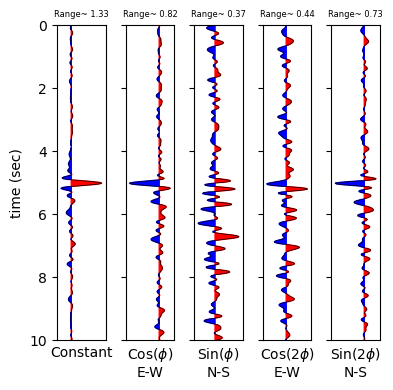

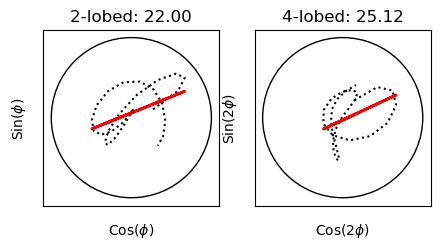

In [2]:
import pandas as pd
from codes_RF.HDPM import info_extract


station = "fcc"
station = station.upper()
wave_df = pd.read_csv("DATA/waveforms_list.csv")
wave_df = wave_df[(wave_df["sta_code"] == station) & (wave_df["rf_quality"] == 1)]
wave_list = [f"DATA/RF/{i}.pkl" for i in wave_df["file_name"]]


wave, G = info_extract(wave_list)
m = harmonic_decomp(wave, G)
address = "Results/HARMINIC_DECOMP/ParticleMotion"
particlemotion(m, type="2-lobed", xmin=1, xmax=7, save_folder=address, station=station)